### Giới thiệu về Tập dữ liệu (Dữ liệu meta)
#### Bối cảnh
Đây là loại dữ liệu đa biến, có nghĩa là cung cấp hoặc liên quan đến nhiều biến số toán học hoặc thống kê riêng biệt, phân tích dữ liệu số đa biến. Nó bao gồm 14 thuộc tính là tuổi, giới tính, loại đau ngực, huyết áp khi nghỉ ngơi, cholesterol huyết thanh, lượng đường trong máu lúc đói, kết quả điện tâm đồ khi nghỉ ngơi, nhịp tim tối đa đạt được, đau thắt ngực do tập thể dục, đỉnh điểm cũ - ST trầm cảm do tập thể dục liên quan đến nghỉ ngơi, độ dốc của đoạn ST gắng sức đỉnh điểm, số lượng mạch máu chính và bệnh Thalassemia. Cơ sở dữ liệu này bao gồm 15 thuộc tính, nhưng tất cả các nghiên cứu được công bố đều liên quan đến việc sử dụng một tập hợp con gồm 14 thuộc tính trong số đó. Cơ sở dữ liệu UCI Machine Learning Repository là cơ sở dữ liệu được các nhà nghiên cứu ML sử dụng . Một trong những nhiệm vụ chính của tập dữ liệu này là dự đoán dựa trên các đặc điểm nhất định của bệnh nhân rằng liệu người cụ thể đó có mắc bệnh tim hay không và nhiệm vụ thử nghiệm khác là chẩn đoán và tìm ra những hiểu biết sâu sắc khác nhau từ tập dữ liệu này, điều này có thể giúp hiểu được vấn đề nhiều hơn.

### Nội dung
#### Mô tả cột:
* `Name `tên bệnh nhân
* `age` Tuổi của bệnh nhân tính theo năm
* `sex` Giới tính 1=Nam,0=Nữ
* `cp` Kiểu đau ngực 
  0. đau thắt ngực điển hình.
  1. đau thắt ngực không điển hình.
  2. không đau thắt ngực.
  3. không có triệu chứng.
* `trestbps` Huyết áp khi nghỉ ngơi (huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện))
* `chol` Cholesterol huyết thanh tính bằng mg/dl
* `fbs` Nếu đường huyết lúc đói > 120 mg/dl(1 = đúng;0 =sai)
* `restecg` Kết quả điện tâm đồ khi nghỉ ngơi (0=bình thường,1= bất thường 2= phì đại )
* `thalach` Đạt được nhịp tim tối đa
* `exang` Đau thắt ngực do tập thể dục (1=Đúng,0=/Sai)
* `oldpeak` ST chênh xuống do gắng sức so với nghỉ ngơ(Đoạn ST là một phần của chu kỳ tim điện học, nằm giữa kết thúc sóng S (kết thúc quá trình khử cực tâm thất) và bắt đầu sóng T (quá trình tái cực tâm thất)
* `slope` Độ dốc của đoạn ST luyện tập đỉnh ca (0= Đi xuống, 1: Đi lên, 2:Cân bằng)
* `ca` số mạch chính (0-3) được tô màu bằng soi huỳnh quang
* `thal` Mô tả mức độ tổn thương cơ tim và lưu lượng máu( 0=bình thường; 1= khiếm khuyết cố định;2=Lưu lượng máu bình thường,3= khiếm khuyết có thể đảo ngược)
* `num` thuộc tính được dự đoán(0- Không bị bệnh,1-bị bệnh)



In [1]:
#import dữ liệu cần thiết
import pandas as pd
import numpy as np

#Trực quan dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
#Bỏ qua cảnh cáo
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HeartAttackDataSet.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      182 non-null    object 
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [3]:
data.sample(10)

,Name,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
129,Shiela Apthorpe,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
175,Veronica Norcia,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
18,Ann Devon,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
180,Aurora Crumpacker,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
226,NaN,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
26,Paolo Accorti,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
84,Paul Henriot,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
191,NaN,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
211,NaN,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
192,NaN,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Xử lý dữ liệu

In [5]:
data.drop(columns=['Name'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Lọc dữ liệu chứa missing
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [8]:
#Số lượng các mạch chính: 
#0 -> 3 trong chú thích mẫu của tác giả
# có thể do sự nhầm lẫn khi nhập dữ liệu
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [9]:
#kiểm tra lại dữ liệu
data['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [10]:
#Thống kê dữ liệu trùng lặp
data.duplicated(keep=False).sum()

2

In [11]:
#Xóa bớt bản ghi trùng lặp , lấy bản ghi đầu tiên
data= data.drop_duplicates(keep='first')

In [12]:
#Thống kê dữ liệu trùng lặp
data.duplicated(keep=False).sum()

0

In [13]:
data.loc[data['ca'] == 4, 'ca'] = 3

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
data.to_csv('heart_lamsach.csv', index=False)

# Tiền xử lý dữ liệu

In [16]:
data2 =pd.read_csv('heart_lamsach.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Xử lý giá trị ngoại lai của từng biến liên tục

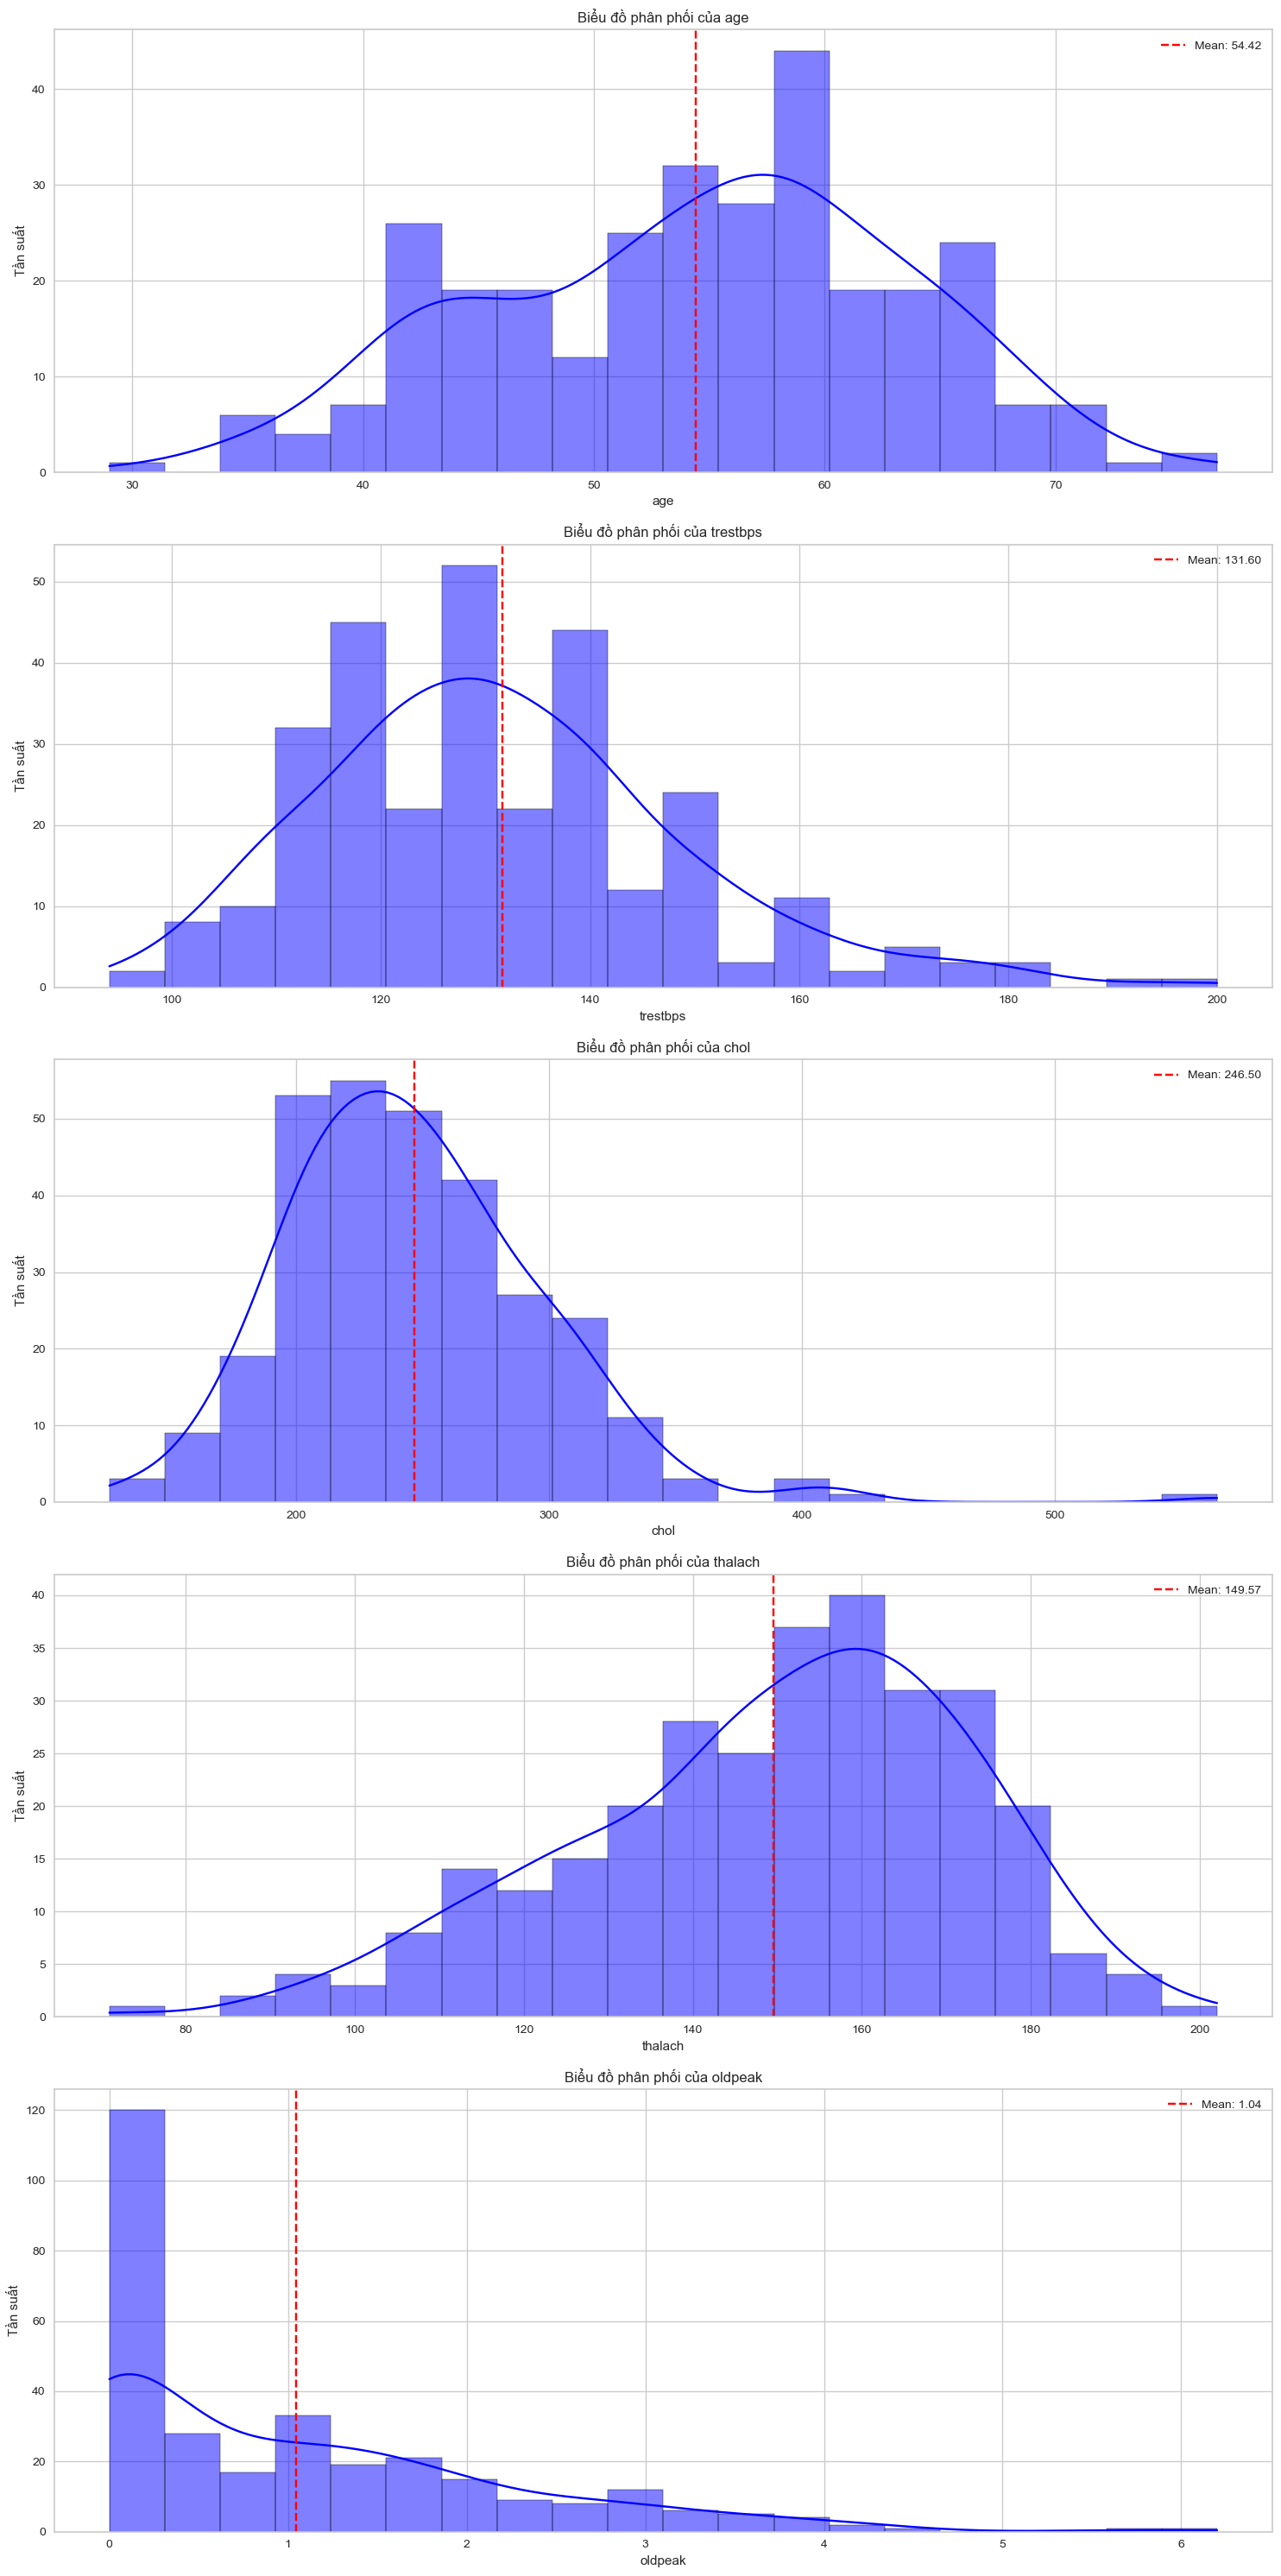

In [17]:
# Tạo biểu đồ phân phối với đường giá trị trung bình cho các cột 'age','trestbps','chol','thalach','oldpeak'
columns_to_plot = ['age','trestbps','chol','thalach','oldpeak']
averages = data2[columns_to_plot].mean()
plt.figure(figsize=(15, 30))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5,1, i)
    sns.histplot(data2[col], kde=True, color='blue', bins=20)
    plt.axvline(averages[col], color='red', linestyle='--', label=f'Mean: {averages[col]:.2f}')
    plt.title(f'Biểu đồ phân phối của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.legend()

plt.tight_layout()
plt.show()

# Nhận xét

## Cột 'age'
1. Phân phối dữ liệu:
Biểu đồ có hình dạng tương đối giống phân phối chuẩn nhưng hơi lệch phải .
Độ tuổi trung bình của tập dữ liệu là khoảng 54.42 tuổi (thể hiện qua đường kẻ đỏ).
2. Quan sát:
Số lượng người ở độ tuổi từ 50 đến 60 tuổi chiếm tỷ lệ cao nhất trong tập dữ liệu.
Rất ít trường hợp ở nhóm tuổi dưới 40 hoặc trên 70.
## Cột trestbps:
1. Phân phối dữ liệu:
- Có xu hướng lệch nhẹ về bên phải , với đa số các giá trị tập trung quanh khoảng 120-140.
- Có một số giá trị cao bất thường (xấp xỉ 180-200), có thể là ngoại lệ.
- Đường trung bình (Mean) được hiển thị tại khoảng 131.60, nằm gần tâm của phân phối chính.
## Cột chol:
1. Phân phối dữ liệu:
- Lệch phải rõ rệt, với hầu hết các giá trị nằm trong khoảng từ 200-300.
- Có một số giá trị vượt xa trên 400, đây là các giá trị bất thường hoặc ngoại lệ.
- Đường trung bình (Mean) tại 246.50 cũng phản ánh sự dịch chuyển của phân phối do các giá trị cao bất thường.
## Cột thalach:
1. Phân phối dữ liệu: Gần giống phân phối chuẩn (hình chuông), với phần lớn dữ liệu tập trung quanh giá trị trung bình.
Giá trị trung bình (Mean): 149.57 (được biểu thị bằng đường đứt nét màu đỏ).
2. Quan sát:
- Dữ liệu tập trung chủ yếu trong khoảng 120 đến 170, với tần suất cao nhất gần giá trị trung bình.
- Phân phối đối xứng, có một số giá trị cao bất thường (>70), có thể là ngoại lệ.
- Đây là một phân phối tốt, có thể dùng trong các phân tích thống kê yêu cầu dữ liệu gần chuẩn.
## Cột oldpeak:
1. Phân phối dữ liệu: Phân phối lệch phải (dữ liệu tập trung ở các giá trị nhỏ và giảm dần khi giá trị tăng).
Giá trị trung bình (Mean): 1.04 .
2. Quan sát:
- Đa số dữ liệu tập trung ở mức 0 và 1, tần suất giảm mạnh khi oldpeak lớn hơn 2.
- Phân phối không đối xứng, với đuôi kéo dài về phía giá trị cao, điều này có thể ảnh hưởng đến một số phân tích thống kê.
- Có thể cần xem xét các phương pháp xử lý dữ liệu, chẳng hạn như chuẩn hóa hoặc chuyển đổi logarit, nếu cần sử dụng trong các mô hình.

In [18]:
data2['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

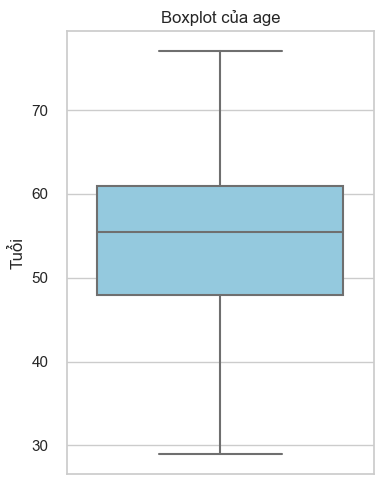

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 5))
sns.boxplot(y=data2['age'], color="skyblue")
plt.title('Boxplot của age')
plt.ylabel('Tuổi')
plt.tight_layout()
plt.show()
#Như biểu đồ trên , cột 'age' không có giá trị ngoại lệ

In [20]:
data2['trestbps'].describe()
#trestbps (hay huyết áp lúc nghỉ) thường đề cập đến huyết áp tâm thu (systolic blood pressure), tức giá trị huyết áp khi tim co bóp để bơm máu đi khắp cơ thể.

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

### Phân loại huyết áp (trestbps)

| Khoảng giá trị (mmHg)      | Ý nghĩa                     |
|-----------------------------|-----------------------------|
| <=90 mmHg                 | Huyết áp thấp         |
| 90–139 mmHg                | Huyết áp bình thường            |
| >= 140 mmHg                  | Huyết áp cao                |
| >= 180 mmHg                  | Huyết áp khẩn cấp                |

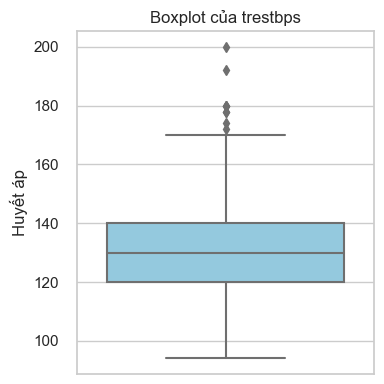

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['trestbps'], color="skyblue")
plt.title('Boxplot của trestbps')
plt.ylabel('Huyết áp')
plt.tight_layout()
plt.show()
# xuất hiện các giá trị ngoại lai >170

In [22]:
# Xác định ngưỡng giá trị outliers 
Q1 = data2['trestbps'].quantile(0.25)
Q3 = data2['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data2[(data2['trestbps'] < lower_bound) | (data2['trestbps'] > upper_bound)]
print(outliers['trestbps']) 

8      172
101    178
110    180
202    180
222    200
240    174
247    192
259    178
265    180
Name: trestbps, dtype: int64


In [23]:
# Thay thế giá trị trestbps lớn hơn 170 bằng giá trị trung bình của cột đó
mean_trestbps = data2['trestbps'][data2['trestbps'] <= 170].mean()  # Giá trị trung bình không vượt quá 170
data2.loc[data2['trestbps'] > 170, 'trestbps'] = mean_trestbps

# Kiểm tra lại dữ liệu
data2['trestbps'].describe()


count    302.000000
mean     130.068259
std       15.148505
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64

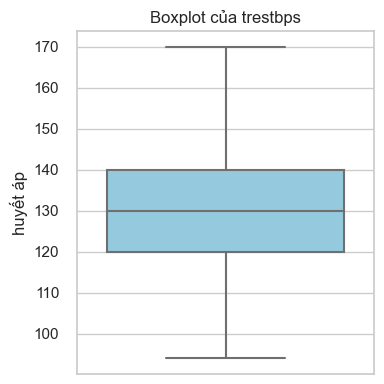

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['trestbps'], color="skyblue")
plt.title('Boxplot của trestbps')
plt.ylabel('huyết áp')
plt.tight_layout()
plt.show()
# đã xử lý xong ngoại lệ

In [25]:
data2['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

### Phân loại Cholesterol

| Mức Cholesterol          | Khoảng giá trị (mg/dL)     |
|---------------------------|-----------------------------|
| **Bình thường**            | < 200 mg/dL                 |
| **Ranh giới cao**          | 200–239 mg/dL               |
| **Tăng cao**               | ≥ 240 mg/dL                 | 

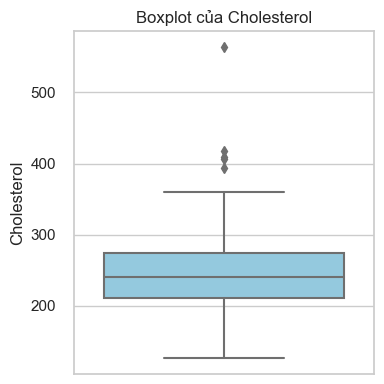

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['chol'], color="skyblue")
plt.title('Boxplot của Cholesterol')
plt.ylabel('Cholesterol')
plt.tight_layout()
plt.show()

In [27]:
# Xác định ngưỡng giá trị outliers 
Q1 = data2['chol'].quantile(0.25)
Q3 = data2['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data2[(data2['chol'] < lower_bound) | (data2['chol'] > upper_bound)]
print(outliers['chol']) 

28     417
85     564
96     394
219    407
245    409
Name: chol, dtype: int64


In [28]:
# Thay thế giá trị chol lớn hơn 350 bằng giá trị trung bình của cột đó(biểu đồ phân phối cũng thể hiện giá trị ngoại lai >350)
mean_chol = data2['chol'][(data2['chol'] >= 200) & (data2['chol'] <= 240)].mean()  # Giá trị trung bình trong ngưỡng 200-240 mg/dL
data2.loc[data2['chol'] > 350, 'chol'] = mean_chol

# Kiểm tra lại dữ liệu
data2['chol'].describe()


count    302.000000
mean     241.564407
std       43.306019
min      126.000000
25%      211.000000
50%      238.000000
75%      270.000000
max      342.000000
Name: chol, dtype: float64

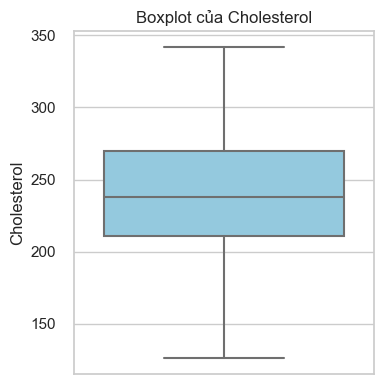

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['chol'], color="skyblue")
plt.title('Boxplot của Cholesterol')
plt.ylabel('Cholesterol')
plt.tight_layout()
plt.show()

In [30]:
# tuổi trong khoảng 1-100 -> nhịp tim tối đa 120-219
data2['thalach'].describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

#### Nhịp tim tối đa là nhịp tim nhanh nhất mà tim có thể đạt được khi hoạt động mạnh, được tính toán dựa trên tuổi. Công thức phổ biến nhất là:
#### MHR=220−Tuổi

### Phân loại nhịp tim bất thường :

| **Nhịp tim tối đa (bpm)** | **Mức độ bất thường**                 |
|---------------------------|---------------------------------------|
| 100–119                  | Nhẹ, cần theo dõi thêm               |
| 80–99                    | Trung bình, nghi ngờ suy tim/rối loạn nhịp |
| <80                      | Nặng, cần kiểm tra y tế khẩn cấp      |


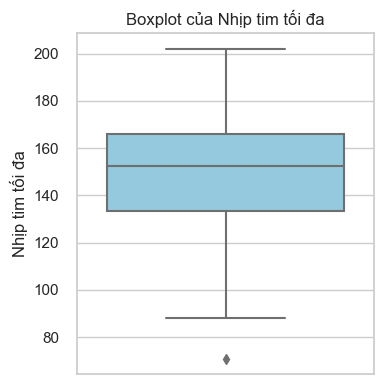

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['thalach'], color="skyblue")
plt.title('Boxplot của Nhịp tim tối đa')
plt.ylabel('Nhịp tim tối đa')
plt.tight_layout()
plt.show()

In [32]:
# Xác định ngưỡng giá trị outliers 
Q1 = data2['thalach'].quantile(0.25)
Q3 = data2['thalach'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data2[(data2['thalach'] < lower_bound) | (data2['thalach'] > upper_bound)]
print(outliers['thalach']) 

271    71
Name: thalach, dtype: int64


In [33]:
# Nhịp tim tối đa lớn nhất là 202 , nhỏ nhất là 71 
data2[data2['thalach']<80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
271,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0


In [34]:
# Tính giá trị trung bình của các giá trị >= 100 trong cột 'thalach'
mean_thalach = data2[data2['thalach'] >= 100]['thalach'].mean()
# Thay thế các giá trị < 99 bằng giá trị trung bình tính được
data2.loc[data2['thalach'] < 80, 'thalach'] = mean_thalach

print(data2['thalach'].describe())


count    302.000000
mean     149.834933
std       22.449951
min       88.000000
25%      134.500000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


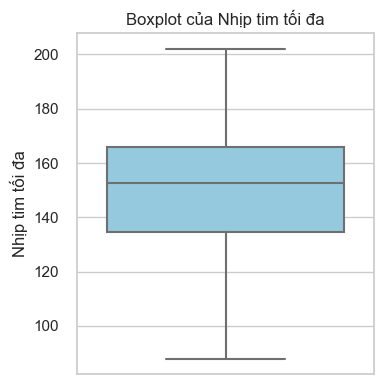

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['thalach'], color="skyblue")
plt.title('Boxplot của Nhịp tim tối đa')
plt.ylabel('Nhịp tim tối đa')
plt.tight_layout()
plt.show()

### Phân loại oldpeak 
| **Nhóm**   | **Khoảng giá trị** | 
|------------|--------------------|
| **Bình thường** | 0 - 0.5            |
| **Bất thường nhẹ**   | 0.5 - 1.0          | 
| **Bất thường trung bình**| 1.0 - 2.0         | 
| **Bất thường nghiêm trọng** | ≥ 2.0              | 



In [36]:
# độ giảm ST
data2['oldpeak'].describe()

count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

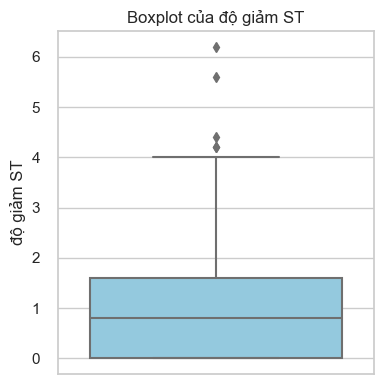

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['oldpeak'], color="skyblue")
plt.title('Boxplot của độ giảm ST')
plt.ylabel('độ giảm ST')
plt.tight_layout()
plt.show()

In [38]:
# Xác định ngưỡng giá trị outliers 
Q1 = data2['oldpeak'].quantile(0.25)
Q3 = data2['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data2[(data2['oldpeak'] < lower_bound) | (data2['oldpeak'] > upper_bound)]
print(outliers['oldpeak']) 

101    4.2
203    6.2
220    5.6
249    4.2
290    4.4
Name: oldpeak, dtype: float64


In [39]:
# Tính giá trị trung bình của các giá trị >= 100 trong cột 'thalach'
mean_oldpeak = data2[data2['oldpeak'] < 4]['oldpeak'].mean()
# Thay thế các giá trị >4  bằng giá trị trung bình tính được
data2.loc[data2['oldpeak'] > 4, 'oldpeak'] = mean_oldpeak

print(data2['oldpeak'].describe())

count    302.000000
mean       0.977267
std        1.041048
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        4.000000
Name: oldpeak, dtype: float64


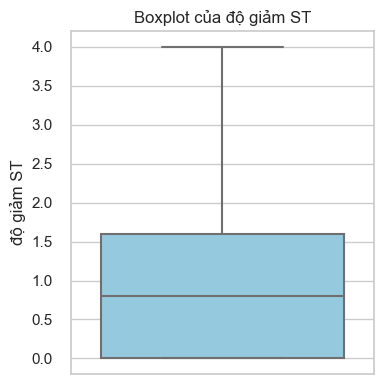

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.boxplot(y=data2['oldpeak'], color="skyblue")
plt.title('Boxplot của độ giảm ST')
plt.ylabel('độ giảm ST')
plt.tight_layout()
plt.show()

In [41]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.068259,241.564407,0.149007,0.526490,149.834933,0.327815,0.977267,1.397351,0.705298,2.314570,0.543046
std,9.04797,0.466426,1.032044,15.148505,43.306019,0.356686,0.526027,22.449951,0.470196,1.041048,0.616274,0.969247,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,238.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,342.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


In [42]:
data2.to_csv('heart_xulyngoailai.csv', index=False)

## Xử lý mất cân bằng dữ liệu 

In [43]:
data3=pd.read_csv('heart_lamsach.csv')
data3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.705298,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.969247,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


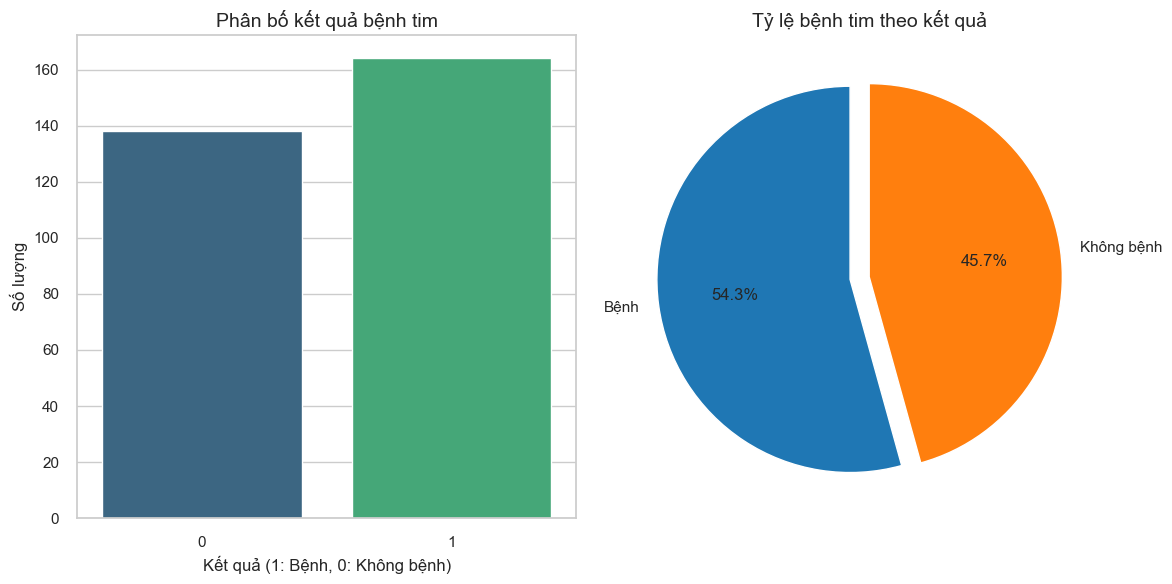

In [44]:
# Biểu đồ 1: Phân bố giá trị 'target' 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Biểu đồ cột
sns.countplot(data=data3, x='target', palette='viridis', ax=axes[0])
axes[0].set_title("Phân bố kết quả bệnh tim", fontsize=14)
axes[0].set_xlabel("Kết quả (1: Bệnh, 0: Không bệnh)", fontsize=12)
axes[0].set_ylabel("Số lượng", fontsize=12)

# Biểu đồ tròn
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Bệnh', 'Không bệnh'], colors=['#1f77b4', '#ff7f0e'], startangle=90, explode=(0.1, 0), ax=axes[1])
axes[1].set_title("Tỷ lệ bệnh tim theo kết quả", fontsize=14)
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


#### dữ liệu cột 'target' mất cân bằng nhẹ nhưng không cần thiết phải cân bằng

# Rời rạc hóa các biến liên tục

Biến age thường không có các ngưỡng tự nhiên rõ ràng, và việc rời rạc hóa giúp phân loại thành các nhóm tuổi dễ hiểu (ví dụ: 40-50, 50-60).

In [45]:
data4=pd.read_csv('heart_xulyngoailai.csv')
data4.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.068259,241.564407,0.149007,0.526490,149.834933,0.327815,0.977267,1.397351,0.705298,2.314570,0.543046
std,9.04797,0.466426,1.032044,15.148505,43.306019,0.356686,0.526027,22.449951,0.470196,1.041048,0.616274,0.969247,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,238.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,342.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


In [46]:
data4.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.068259,241.564407,0.149007,0.526490,149.834933,0.327815,0.977267,1.397351,0.705298,2.314570,0.543046
std,9.04797,0.466426,1.032044,15.148505,43.306019,0.356686,0.526027,22.449951,0.470196,1.041048,0.616274,0.969247,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,238.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,342.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


In [47]:
# Rời rạc hóa cột 'age' thành các nhóm
labels_age = ['thanh niên', 'trung niên', 'già', 'rất già']
data4['age_group_num'] = pd.cut(data4['age'], bins=[0, 30, 50, 70,float('inf')], labels=range(len(labels_age))).astype(int)


### Phân loại huyết áp (trestbps)

| Khoảng giá trị (mmHg)      | Ý nghĩa                     |
|-----------------------------|-----------------------------|
| <=90 mmHg                 | Huyết áp thấp         |
| 90–139 mmHg                | Huyết áp bình thường            |
| >= 140 mmHg                  | Huyết áp cao                |
| >= 180 mmHg                  | Huyết áp khẩn cấp                |

In [48]:
# Rời rạc hóa cột 'trestbps' (Huyết áp khi nghỉ)
labels_trestbps = ['thấp', 'bình thường', 'cao', 'rất cao']
data4['trestbps_group_num'] = pd.cut(data4['trestbps'], bins=[0, 90, 140, 180, float('inf')], labels=range(len(labels_trestbps))).astype(int)


### Phân loại Cholesterol

| Mức Cholesterol          | Khoảng giá trị (mg/dL)     |
|---------------------------|-----------------------------|
| **Bình thường**            | < 200 mg/dL                 |
| **Ranh giới cao**          | 200–239 mg/dL               |
| **Tăng cao**               | ≥ 240 mg/dL                 | 

In [49]:
# Rời rạc hóa cột 'chol' (Cholesterol)
labels_chol = ['bình thường', 'ranh giới cao', 'cao', 'rất cao']
data4['chol_group_num'] = pd.cut(data4['chol'], bins=[0, 200, 240, 300, float('inf')], labels=range(len(labels_chol))).astype(int)


### Phân loại nhịp tim bất thường :

| **Nhịp tim tối đa (bpm)** | **Mức độ bất thường**                 |
|---------------------------|---------------------------------------|
| 100–119                  | Nhẹ, cần theo dõi thêm               |
| 80–99                    | Trung bình, nghi ngờ suy tim/rối loạn nhịp |
| <80                      | Nặng, cần kiểm tra y tế khẩn cấp      |


In [50]:
# Rời rạc hóa cột 'thalach' (Nhịp tim tối đa)
labels_thalach = ['rất thấp', 'thấp', 'bình thường', 'cao']
data4['thalach_group_num'] = pd.cut(data4['thalach'], bins=[0, 80, 99, 119, float('inf')], labels=range(len(labels_thalach))).astype(int)


### Phân loại oldpeak 
| **Nhóm**   | **Khoảng giá trị** | 
|------------|--------------------|
| **Bình thường** | 0 - 0.5            |
| **Bất thường nhẹ**   | 0.5 - 1.0          | 
| **Bất thường trung bình**| 1.0 - 2.0         | 
| **Bất thường nghiêm trọng** | ≥ 2.0              | 



In [51]:
# Rời rạc hóa cột 'oldpeak' (ST độ giảm)
labels_oldpeak = ['bình thường', 'nhẹ', 'cao', 'rất cao']
data4['oldpeak_group_num'] = pd.cut(data4['oldpeak'], bins=[-float('inf'),0.5, 1.0, 2.0,float('inf')],labels=range(len(labels_oldpeak))).astype(float)


In [52]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 302 non-null    int64  
 1   sex                 302 non-null    int64  
 2   cp                  302 non-null    int64  
 3   trestbps            302 non-null    float64
 4   chol                302 non-null    float64
 5   fbs                 302 non-null    int64  
 6   restecg             302 non-null    int64  
 7   thalach             302 non-null    float64
 8   exang               302 non-null    int64  
 9   oldpeak             302 non-null    float64
 10  slope               302 non-null    int64  
 11  ca                  302 non-null    int64  
 12  thal                302 non-null    int64  
 13  target              302 non-null    int64  
 14  age_group_num       302 non-null    int32  
 15  trestbps_group_num  302 non-null    int32  
 16  chol_gro

In [53]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.0,55.5,61.0,77.0
sex,302.0,0.682119,0.466426,0.0,0.0,1.0,1.0,1.0
cp,302.0,0.963576,1.032044,0.0,0.0,1.0,2.0,3.0
trestbps,302.0,130.068259,15.148505,94.0,120.0,130.0,140.0,170.0
chol,302.0,241.564407,43.306019,126.0,211.0,238.0,270.0,342.0
fbs,302.0,0.149007,0.356686,0.0,0.0,0.0,0.0,1.0
restecg,302.0,0.526490,0.526027,0.0,0.0,1.0,1.0,2.0
thalach,302.0,149.834933,22.449951,88.0,134.5,152.5,166.0,202.0
exang,302.0,0.327815,0.470196,0.0,0.0,0.0,1.0,1.0
oldpeak,302.0,0.977267,1.041048,0.0,0.0,0.8,1.6,4.0


In [54]:

# Lưu dữ liệu mới vào file nếu cần
data4.to_csv('heart_ngoailai_roirac.csv', index=False)


# Chuấn hóa dữ liệu

In [55]:
data5=pd.read_csv('heart_xulyngoailai.csv')
data5.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.068259,241.564407,0.149007,0.526490,149.834933,0.327815,0.977267,1.397351,0.705298,2.314570,0.543046
std,9.04797,0.466426,1.032044,15.148505,43.306019,0.356686,0.526027,22.449951,0.470196,1.041048,0.616274,0.969247,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,238.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,342.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


In [56]:
from sklearn.preprocessing import MinMaxScaler
data5=pd.read_csv('heart_xulyngoailai.csv')
# Lựa chọn các cột cần chuẩn hóa
normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Tạo bộ chuẩn hóa MinMaxScaler
scaler = MinMaxScaler()
# Áp dụng chuẩn hóa Min-Max trên các cột đã chọn
data5[normalize] = scaler.fit_transform(data3[normalize])
# Hiển thị thông tin sau khi chuẩn hóa
print("Thông tin dữ liệu sau khi chuẩn hóa:")
print(data5.info())
data5.describe().T

Thông tin dữ liệu sau khi chuẩn hóa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.2 KB
None


,count,mean,std,min,25%,50%,75%,max
age,302.0,0.529594,0.188499,0.0,0.395833,0.552083,0.666667,1.0
sex,302.0,0.682119,0.466426,0.0,0.000000,1.000000,1.000000,1.0
cp,302.0,0.963576,1.032044,0.0,0.000000,1.000000,2.000000,3.0
trestbps,302.0,0.354742,0.165692,0.0,0.245283,0.339623,0.433962,1.0
chol,302.0,0.275114,0.118159,0.0,0.194064,0.261416,0.339612,1.0
fbs,302.0,0.149007,0.356686,0.0,0.000000,0.000000,0.000000,1.0
restecg,302.0,0.526490,0.526027,0.0,0.000000,1.000000,1.000000,2.0
thalach,302.0,0.599767,0.174836,0.0,0.475191,0.622137,0.725191,1.0
exang,302.0,0.327815,0.470196,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,302.0,0.168233,0.187331,0.0,0.000000,0.129032,0.258065,1.0


In [57]:
data5.to_csv('heart_ngoailai_chuanhoa.csv', index=False)  

In [70]:
data5.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.529594,0.682119,0.963576,0.354742,0.275114,0.149007,0.526490,0.599767,0.327815,0.168233,1.397351,0.705298,2.314570,0.543046
std,0.188499,0.466426,1.032044,0.165692,0.118159,0.356686,0.526027,0.174836,0.470196,0.187331,0.616274,0.969247,0.613026,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.475191,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.552083,1.000000,1.000000,0.339623,0.261416,0.000000,1.000000,0.622137,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.339612,0.000000,1.000000,0.725191,1.000000,0.258065,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000


# Xây dựng hàm để dự đoán khi : Không sử dụng PCA và Sử dụng PCA để giảm chiều và tìm số thành phần tốt nhất. thì kết quả cho ra như thế nào?


# Huấn luyện mô hình trên tập dữ liệu chỉ được làm sạch 

In [58]:
df = pd.read_csv('heart_lamsach.csv')

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Lần thử: 1
Tỷ lệ dự đoán đúng ID3: 0.53
Lần thử: 2
Tỷ lệ dự đoán đúng ID3: 0.56
Lần thử: 3
Tỷ lệ dự đoán đúng ID3: 0.54
Lần thử: 4
Tỷ lệ dự đoán đúng ID3: 0.64
Lần thử: 5
Tỷ lệ dự đoán đúng ID3: 0.63
Lần thử: 6
Tỷ lệ dự đoán đúng ID3: 0.62
Lần thử: 7
Tỷ lệ dự đoán đúng ID3: 0.74
Lần thử: 8
Tỷ lệ dự đoán đúng ID3: 0.74
Lần thử: 9
Tỷ lệ dự đoán đúng ID3: 0.69
Lần thử: 10
Tỷ lệ dự đoán đúng ID3: 0.74
Lần thử: 11
Tỷ lệ dự đoán đúng ID3: 0.70
Lần thử: 12
Tỷ lệ dự đoán đúng ID3: 0.73
Lần thử: 13
Tỷ lệ dự đoán đúng ID3: 0.70
Số thành phần PCA tối ưu: PCA(n_components=7)


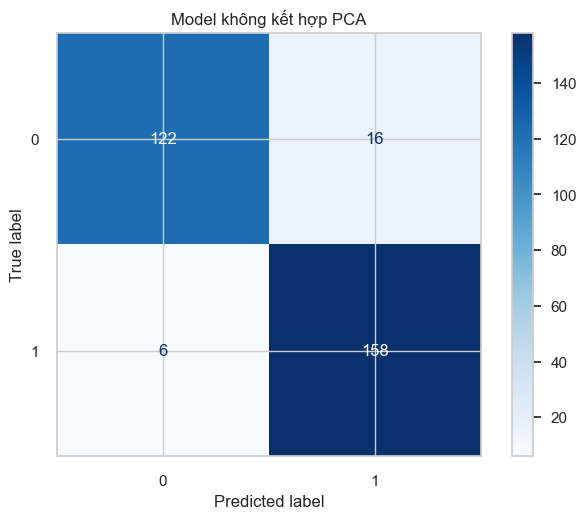

Classification Report - không kết hợp PCA:
              precision    recall  f1-score   support

     Class 0       0.95      0.88      0.92       138
     Class 1       0.91      0.96      0.93       164

    accuracy                           0.93       302
   macro avg       0.93      0.92      0.93       302
weighted avg       0.93      0.93      0.93       302



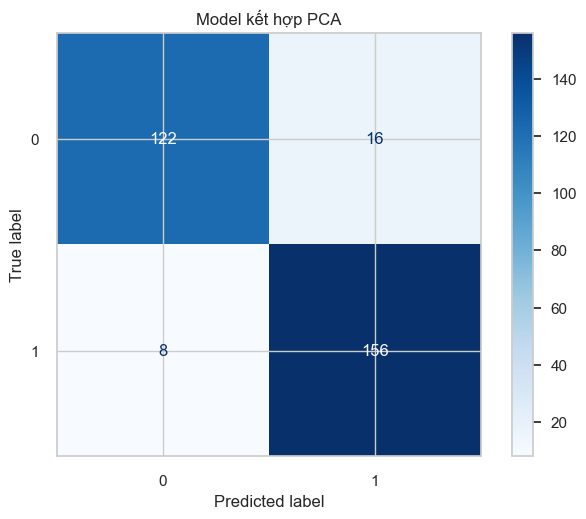

Classification Report - kết hợp PCA:
              precision    recall  f1-score   support

     Class 0       0.94      0.88      0.91       138
     Class 1       0.91      0.95      0.93       164

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



In [59]:
# Import thư viện cần thiết
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Tách đặc trưng và nhãn mục tiêu
X_train_main = df.drop(columns=['target']).values  
y_train_main = df['target'].values                
X_test_main = df.drop(columns=['target']).values   
y_test_main = df['target'].values                  

# Các cột đặc trưng cho PCA
pca_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = np.array(df[pca_features].values)
y = np.array(df['target'])

# Định nghĩa hàm PCA_method
def PCA_method(formula):
    max_accuracy = 0
    pca_best = None
    modeImax = None
    num_pca = 0

    for j in range(1, len(pca_features) + 1):
        print(f"Lần thử: {j}")
        pca = PCA(n_components=j)
        pca.fit(X)
        Xbar = pca.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.3, shuffle=True)
        
        if formula == 'id3':
            id3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
            id3.fit(X_train, y_train)
            y_predict_id3 = id3.predict(X_test)
            rate = accuracy_score(y_test, y_predict_id3)
            print(f"Tỷ lệ dự đoán đúng ID3: {rate:.2f}")
            
            if rate > max_accuracy:
                num_pca = j
                pca_best = pca
                max_accuracy = rate
                modeImax = id3

    return modeImax, pca_best, num_pca, max_accuracy

# Không sử dụng PCA
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
id3.fit(X_train_main, y_train_main)
y_pred_main = id3.predict(X_test_main)

# Sử dụng PCA
id3_PCA, pca_best_id3, num_pca_id3, max_accuracy = PCA_method('id3')
X_test_PCA = pca_best_id3.transform(X_test_main)
y_pred_pca = id3_PCA.predict(X_test_PCA)

print(f"Số thành phần PCA tối ưu: {pca_best_id3}")

# Đánh giá và vẽ ma trận nhầm lẫn
def evaluate_model(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    # Vẽ ma trận nhầm lẫn
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Đánh giá mô hình không sử dụng PCA
evaluate_model(y_test_main, y_pred_main, "Model không kết hợp PCA")
# Báo cáo đánh giá cho mô hình không sử dụng PCA
report_no_pca = classification_report(y_test_main, y_pred_main, target_names=["Class 0", "Class 1"])
print("Classification Report - không kết hợp PCA:")
print(report_no_pca)


# Đánh giá mô hình sử dụng PCA
evaluate_model(y_test_main, y_pred_pca, "Model kết hợp PCA")
# Báo cáo đánh giá cho mô hình sử dụng PCA
report_with_pca = classification_report(y_test_main, y_pred_pca, target_names=["Class 0", "Class 1"])
print("Classification Report - kết hợp PCA:")
print(report_with_pca)



# Huấn luyện mô hình trên tập dữ liệu tiền xử lý ngoại lai + chuẩn hóa hóa dữ liệu

In [60]:
df = pd.read_csv('heart_ngoailai_chuanhoa.csv')

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

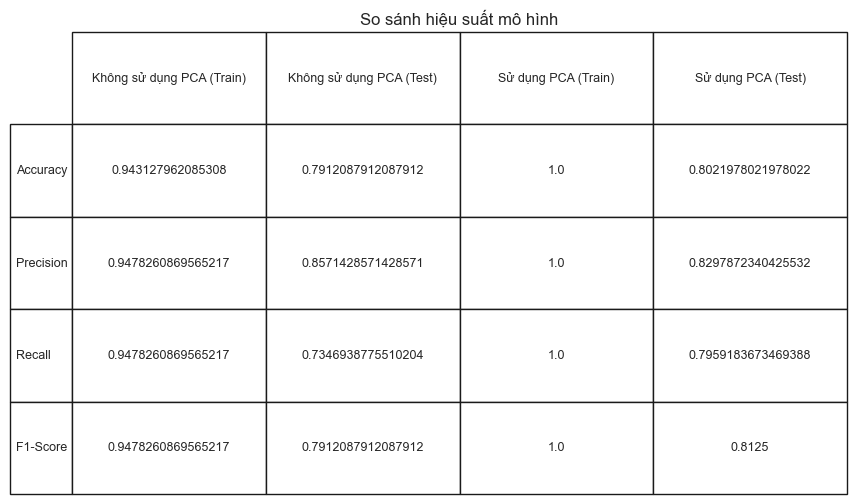

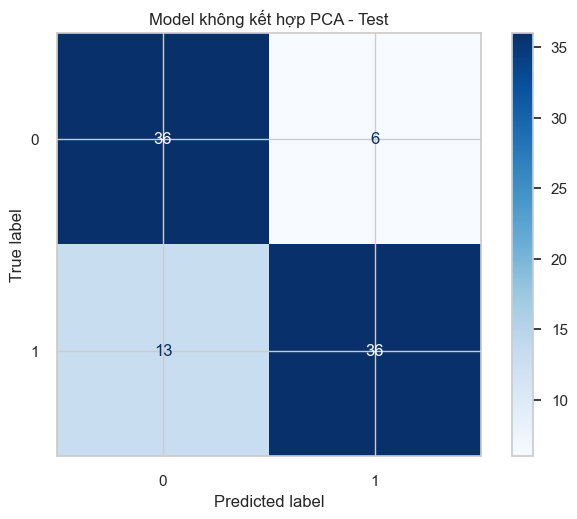

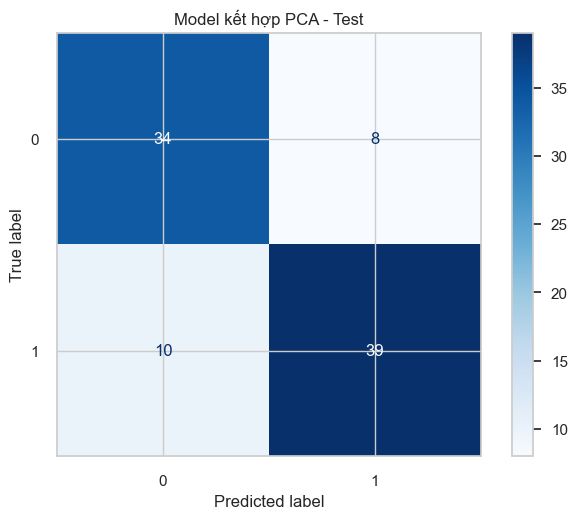

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Tách đặc trưng và nhãn mục tiêu
X_main = df.drop(columns=['target']).values  # Đặc trưng chính
y_main = df['target'].values                # Nhãn mục tiêu

# Các cột đặc trưng được dùng cho PCA
pca_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = np.array(df[pca_features].values)
y = np.array(df['target'])

# Định nghĩa hàm PCA_method để tìm cấu hình tốt nhất
def PCA_method(formula):
    max_accuracy =0 
    best_pca = None 
    best_model = None 
    num_components = 0

    for j in range(1, len(pca_features) + 1):
        pca = PCA(n_components=j)
        pca.fit(X)
        Xbar = pca.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.3, shuffle=True, random_state=42)

        if formula == 'id3':
            model = DecisionTreeClassifier(criterion='entropy', random_state=0)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            if acc > max_accuracy:
                num_components = j
                best_pca = pca
                max_accuracy = acc
                best_model = model

    return best_model, best_pca, num_components, max_accuracy

# Không sử dụng PCA
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_main, y_main, test_size=0.3, random_state=42)
id3.fit(X_train_main, y_train_main)

# Sử dụng PCA
id3_PCA, pca_best_id3, num_pca_id3, max_accuracy = PCA_method('id3')
X_test_PCA = pca_best_id3.transform(X_test_main)

# Hàm tính toán hiệu suất
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Hàm đánh giá và vẽ ma trận nhầm lẫn
def evaluate_model(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Đánh giá hiệu suất trên tập huấn luyện và kiểm tra (không sử dụng PCA)
y_train_pred_main = id3.predict(X_train_main)
y_test_pred_main = id3.predict(X_test_main)
train_metrics_no_pca = compute_metrics(y_train_main, y_train_pred_main)
test_metrics_no_pca = compute_metrics(y_test_main, y_test_pred_main)

y_train_pred_pca = id3_PCA.predict(pca_best_id3.transform(X_train_main))
y_test_pred_pca = id3_PCA.predict(X_test_PCA)

# Đánh giá hiệu suất trên tập huấn luyện và kiểm tra (sử dụng PCA)
train_metrics_with_pca = compute_metrics(y_train_main, y_train_pred_pca)
test_metrics_with_pca = compute_metrics(y_test_main, y_test_pred_pca)

# Tạo bảng tổng hợp hiệu suất
metrics_df = pd.DataFrame({
    "Không sử dụng PCA (Train)": train_metrics_no_pca,
    "Không sử dụng PCA (Test)": test_metrics_no_pca,
    "Sử dụng PCA (Train)": train_metrics_with_pca,
    "Sử dụng PCA (Test)": test_metrics_with_pca
})

# Vẽ bảng tổng hợp hiệu suất
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=metrics_df.values,
         colLabels=metrics_df.columns,
         rowLabels=metrics_df.index,
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1])
plt.title("So sánh hiệu suất mô hình")
plt.show()

# Hiển thị ma trận nhầm lẫn
evaluate_model(y_test_main, y_test_pred_main, "Model không kết hợp PCA - Test")
evaluate_model(y_test_main, y_test_pred_pca, "Model kết hợp PCA - Test")


# Huấn luyện mô hình trên tập dữ liệu tiền xử lý ngoại lai + rời rạc hóa dữ liệu

In [62]:
df = pd.read_csv('heart_ngoailai_roirac.csv')

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group_num',
       'trestbps_group_num', 'chol_group_num', 'thalach_group_num',
       'oldpeak_group_num'],
      dtype='object')

Lần thử: 1
Tỷ lệ dự đoán đúng ID3: 0.77
Lần thử: 2
Tỷ lệ dự đoán đúng ID3: 0.73
Lần thử: 3
Tỷ lệ dự đoán đúng ID3: 0.70
Lần thử: 4
Tỷ lệ dự đoán đúng ID3: 0.71
Lần thử: 5
Tỷ lệ dự đoán đúng ID3: 0.76
Lần thử: 6
Tỷ lệ dự đoán đúng ID3: 0.76
Lần thử: 7
Tỷ lệ dự đoán đúng ID3: 0.80
Lần thử: 8
Tỷ lệ dự đoán đúng ID3: 0.73
Lần thử: 9
Tỷ lệ dự đoán đúng ID3: 0.71
Lần thử: 10
Tỷ lệ dự đoán đúng ID3: 0.76
Lần thử: 11
Tỷ lệ dự đoán đúng ID3: 0.70
Lần thử: 12
Tỷ lệ dự đoán đúng ID3: 0.78
Lần thử: 13
Tỷ lệ dự đoán đúng ID3: 0.65
Số thành phần PCA tối ưu: PCA(n_components=7)


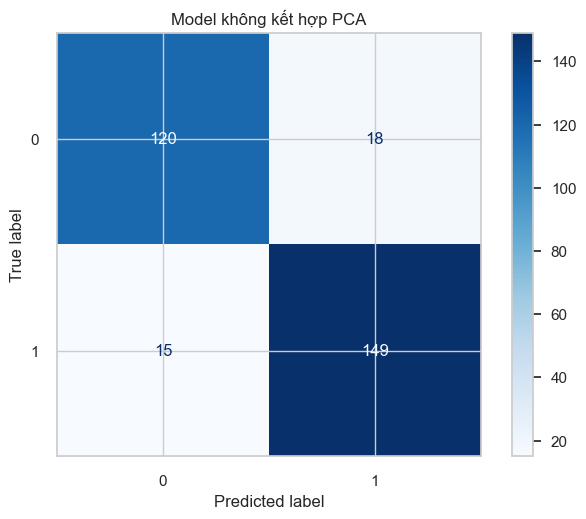

Classification Report - không kết hợp PCA:
              precision    recall  f1-score   support

     Class 0       0.89      0.87      0.88       138
     Class 1       0.89      0.91      0.90       164

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



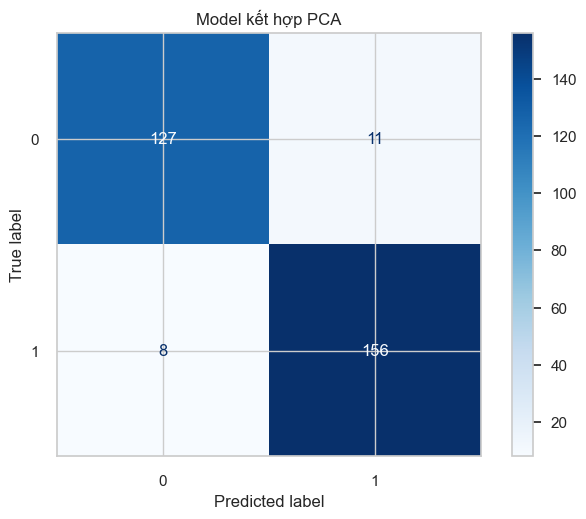

Classification Report - kết hợp PCA:
              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       138
     Class 1       0.93      0.95      0.94       164

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



In [63]:
# Import thư viện cần thiết
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Tách đặc trưng và nhãn mục tiêu
X_train_main = df.drop(columns=['target','age', 'trestbps', 'chol', 'thalach','oldpeak']).values  
y_train_main = df['target'].values                
X_test_main = df.drop(columns=['target','age', 'trestbps', 'chol', 'thalach','oldpeak']).values   
y_test_main = df['target'].values                  

# Các cột đặc trưng cho PCA
pca_features = ['sex', 'cp', 'fbs', 'restecg', 
       'exang', 'slope', 'ca', 'thal', 'age_group_num',
       'trestbps_group_num', 'chol_group_num', 'thalach_group_num',
       'oldpeak_group_num']
X = np.array(df[pca_features].values)
y = np.array(df['target'])

# Định nghĩa hàm PCA_method
def PCA_method(formula):
    max_accuracy = 0
    pca_best = None
    modeImax = None
    num_pca = 0

    for j in range(1, len(pca_features) + 1):
        print(f"Lần thử: {j}")
        pca = PCA(n_components=j)
        pca.fit(X)
        Xbar = pca.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.3, shuffle=True)
        
        if formula == 'id3':
            id3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
            id3.fit(X_train, y_train)
            y_predict_id3 = id3.predict(X_test)
            rate = accuracy_score(y_test, y_predict_id3)
            print(f"Tỷ lệ dự đoán đúng ID3: {rate:.2f}")
            
            if rate > max_accuracy:
                num_pca = j
                pca_best = pca
                max_accuracy = rate
                modeImax = id3

    return modeImax, pca_best, num_pca, max_accuracy

# Không sử dụng PCA
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
id3.fit(X_train_main, y_train_main)
y_pred_main = id3.predict(X_test_main)

# Sử dụng PCA
id3_PCA, pca_best_id3, num_pca_id3, max_accuracy = PCA_method('id3')
X_test_PCA = pca_best_id3.transform(X_test_main)
y_pred_pca = id3_PCA.predict(X_test_PCA)

print(f"Số thành phần PCA tối ưu: {pca_best_id3}")

# Đánh giá và vẽ ma trận nhầm lẫn
def evaluate_model(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    # Vẽ ma trận nhầm lẫn
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Đánh giá mô hình không sử dụng PCA
evaluate_model(y_test_main, y_pred_main, "Model không kết hợp PCA")
# Báo cáo đánh giá cho mô hình không sử dụng PCA
report_no_pca = classification_report(y_test_main, y_pred_main, target_names=["Class 0", "Class 1"])
print("Classification Report - không kết hợp PCA:")
print(report_no_pca)


# Đánh giá mô hình sử dụng PCA
evaluate_model(y_test_main, y_pred_pca, "Model kết hợp PCA")
# Báo cáo đánh giá cho mô hình sử dụng PCA
report_with_pca = classification_report(y_test_main, y_pred_pca, target_names=["Class 0", "Class 1"])
print("Classification Report - kết hợp PCA:")
print(report_with_pca)



# Trực quan hóa dữ liệu

In [64]:
data6=pd.read_csv('heart_ngoailai_roirac.csv')
data6.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_num,trestbps_group_num,chol_group_num,thalach_group_num,oldpeak_group_num
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.068259,241.564407,0.149007,0.526490,149.834933,0.327815,0.977267,1.397351,0.705298,2.314570,0.543046,1.705298,1.185430,1.423841,2.867550,1.096026
std,9.04797,0.466426,1.032044,15.148505,43.306019,0.356686,0.526027,22.449951,0.470196,1.041048,0.616274,0.969247,0.613026,0.498970,0.505030,0.389291,0.899886,0.402244,1.129806
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,238.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000
max,77.00000,1.000000,3.000000,170.000000,342.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000


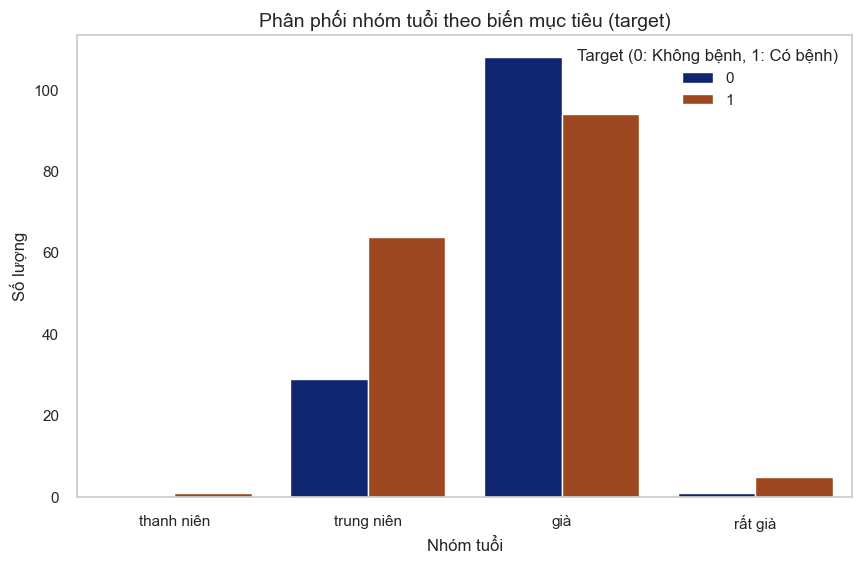

In [65]:
labels_age=['thanh niên', 'trung niên', 'già', 'rất già']
# Thay thế giá trị số trong cột 'age_group_num' bằng nhãn
data6['age_group_label'] = data6['age_group_num'].map({0: 'thanh niên', 1: 'trung niên', 2: 'già', 3: 'rất già'})

# Vẽ biểu đồ phân phối nhóm tuổi theo biến mục tiêu (target)
plt.figure(figsize=(10, 6))
sns.countplot(data=data6, x='age_group_label', hue='target', palette='dark', order=labels_age)
plt.title('Phân phối nhóm tuổi theo biến mục tiêu (target)', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Target (0: Không bệnh, 1: Có bệnh)')
plt.grid(axis='y')
plt.show()

- Nguy cơ mắc bệnh tim có xu hướng cao ở nhóm tuổi trung niên (40-60 tuổi).
- Nhóm tuổi cao (>70 tuổi) cũng có nguy cơ mắc bệnh tim tăng cao, mặc dù số lượng người ít hơn.
- Nhóm người trẻ tuối ít bị bệnh tim hơn

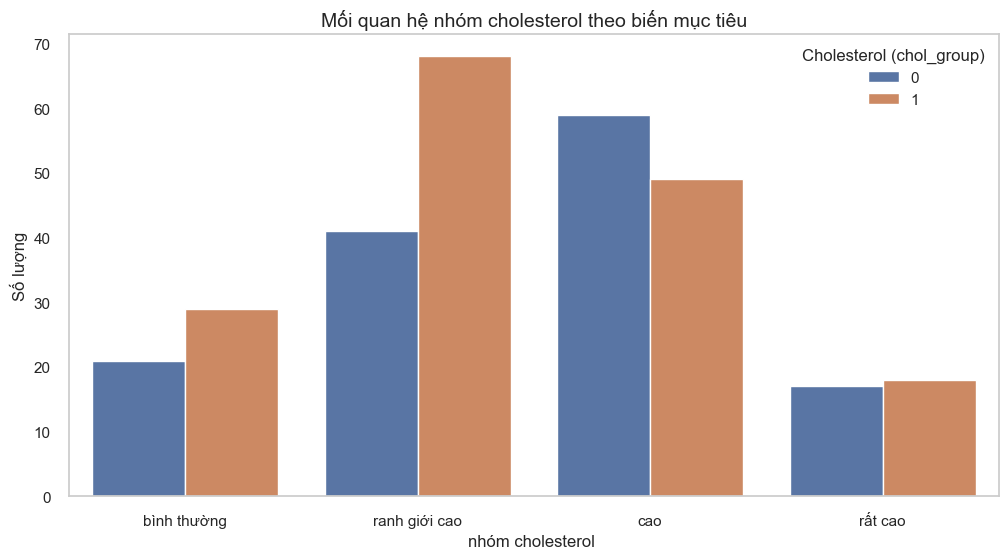

In [66]:
chol_order = ['bình thường', 'ranh giới cao', 'cao', 'rất cao']
# Thay thế giá trị số bằng nhãn trong cột 'chol_group_num'
data6['chol_group_label'] = data6['chol_group_num'].map({0: 'bình thường', 1: 'ranh giới cao', 2: 'cao', 3: 'rất cao'})

plt.figure(figsize=(12, 6))
sns.countplot(data=data6, x='chol_group_label', hue='target', palette='deep', order=chol_order)
plt.title('Mối quan hệ nhóm cholesterol theo biến mục tiêu', fontsize=14)
plt.xlabel('nhóm cholesterol ', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Cholesterol (chol_group)')
plt.grid(axis='y')
plt.show()


- Nhóm cholesterol "ranh giới cao" là nhóm có tỷ lệ mắc bệnh cao nhất.
- Nhóm cholesterol "cao" và "rất cao" có sự cân bằng hơn giữa người mắc và không mắc bệnh.
- Ngay cả nhóm cholesterol "bình thường" vẫn có người mắc bệnh, điều này có thể do các yếu tố nguy cơ khác ngoài cholesterol, như tuổi tác hoặc huyết áp.

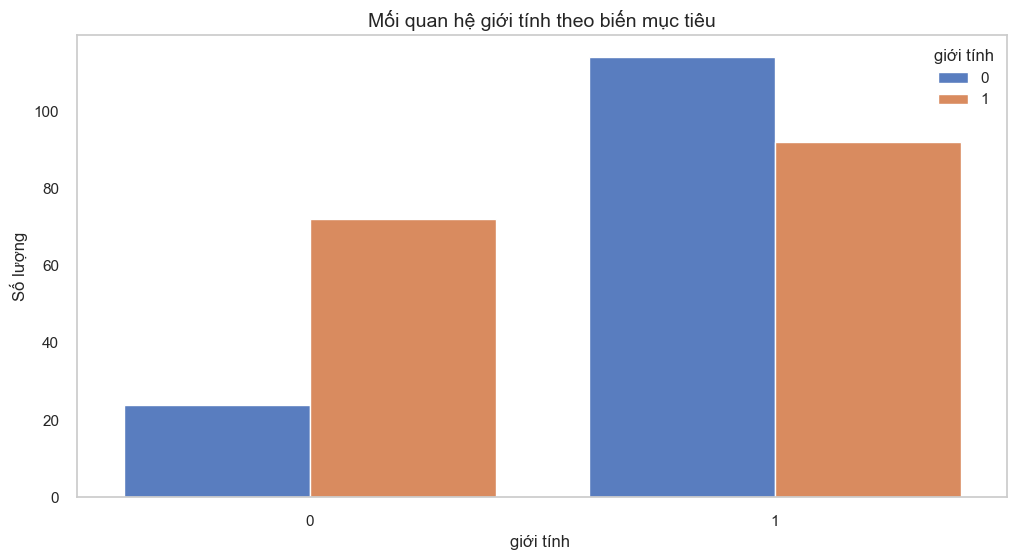

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='sex', hue='target', palette='muted')
plt.title('Mối quan hệ giới tính theo biến mục tiêu', fontsize=14)
plt.xlabel('giới tính ', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='giới tính')
plt.grid(axis='y')
plt.show()

- Nữ giới trong tập dữ liệu này có nguy cơ mắc bệnh cao hơn, mặc dù tổng số lượng nữ ít hơn nam.
- Nam giới chiếm đa số trong tập dữ liệu, với tỷ lệ không mắc bệnh cao hơn so với tỷ lệ mắc bệnh.


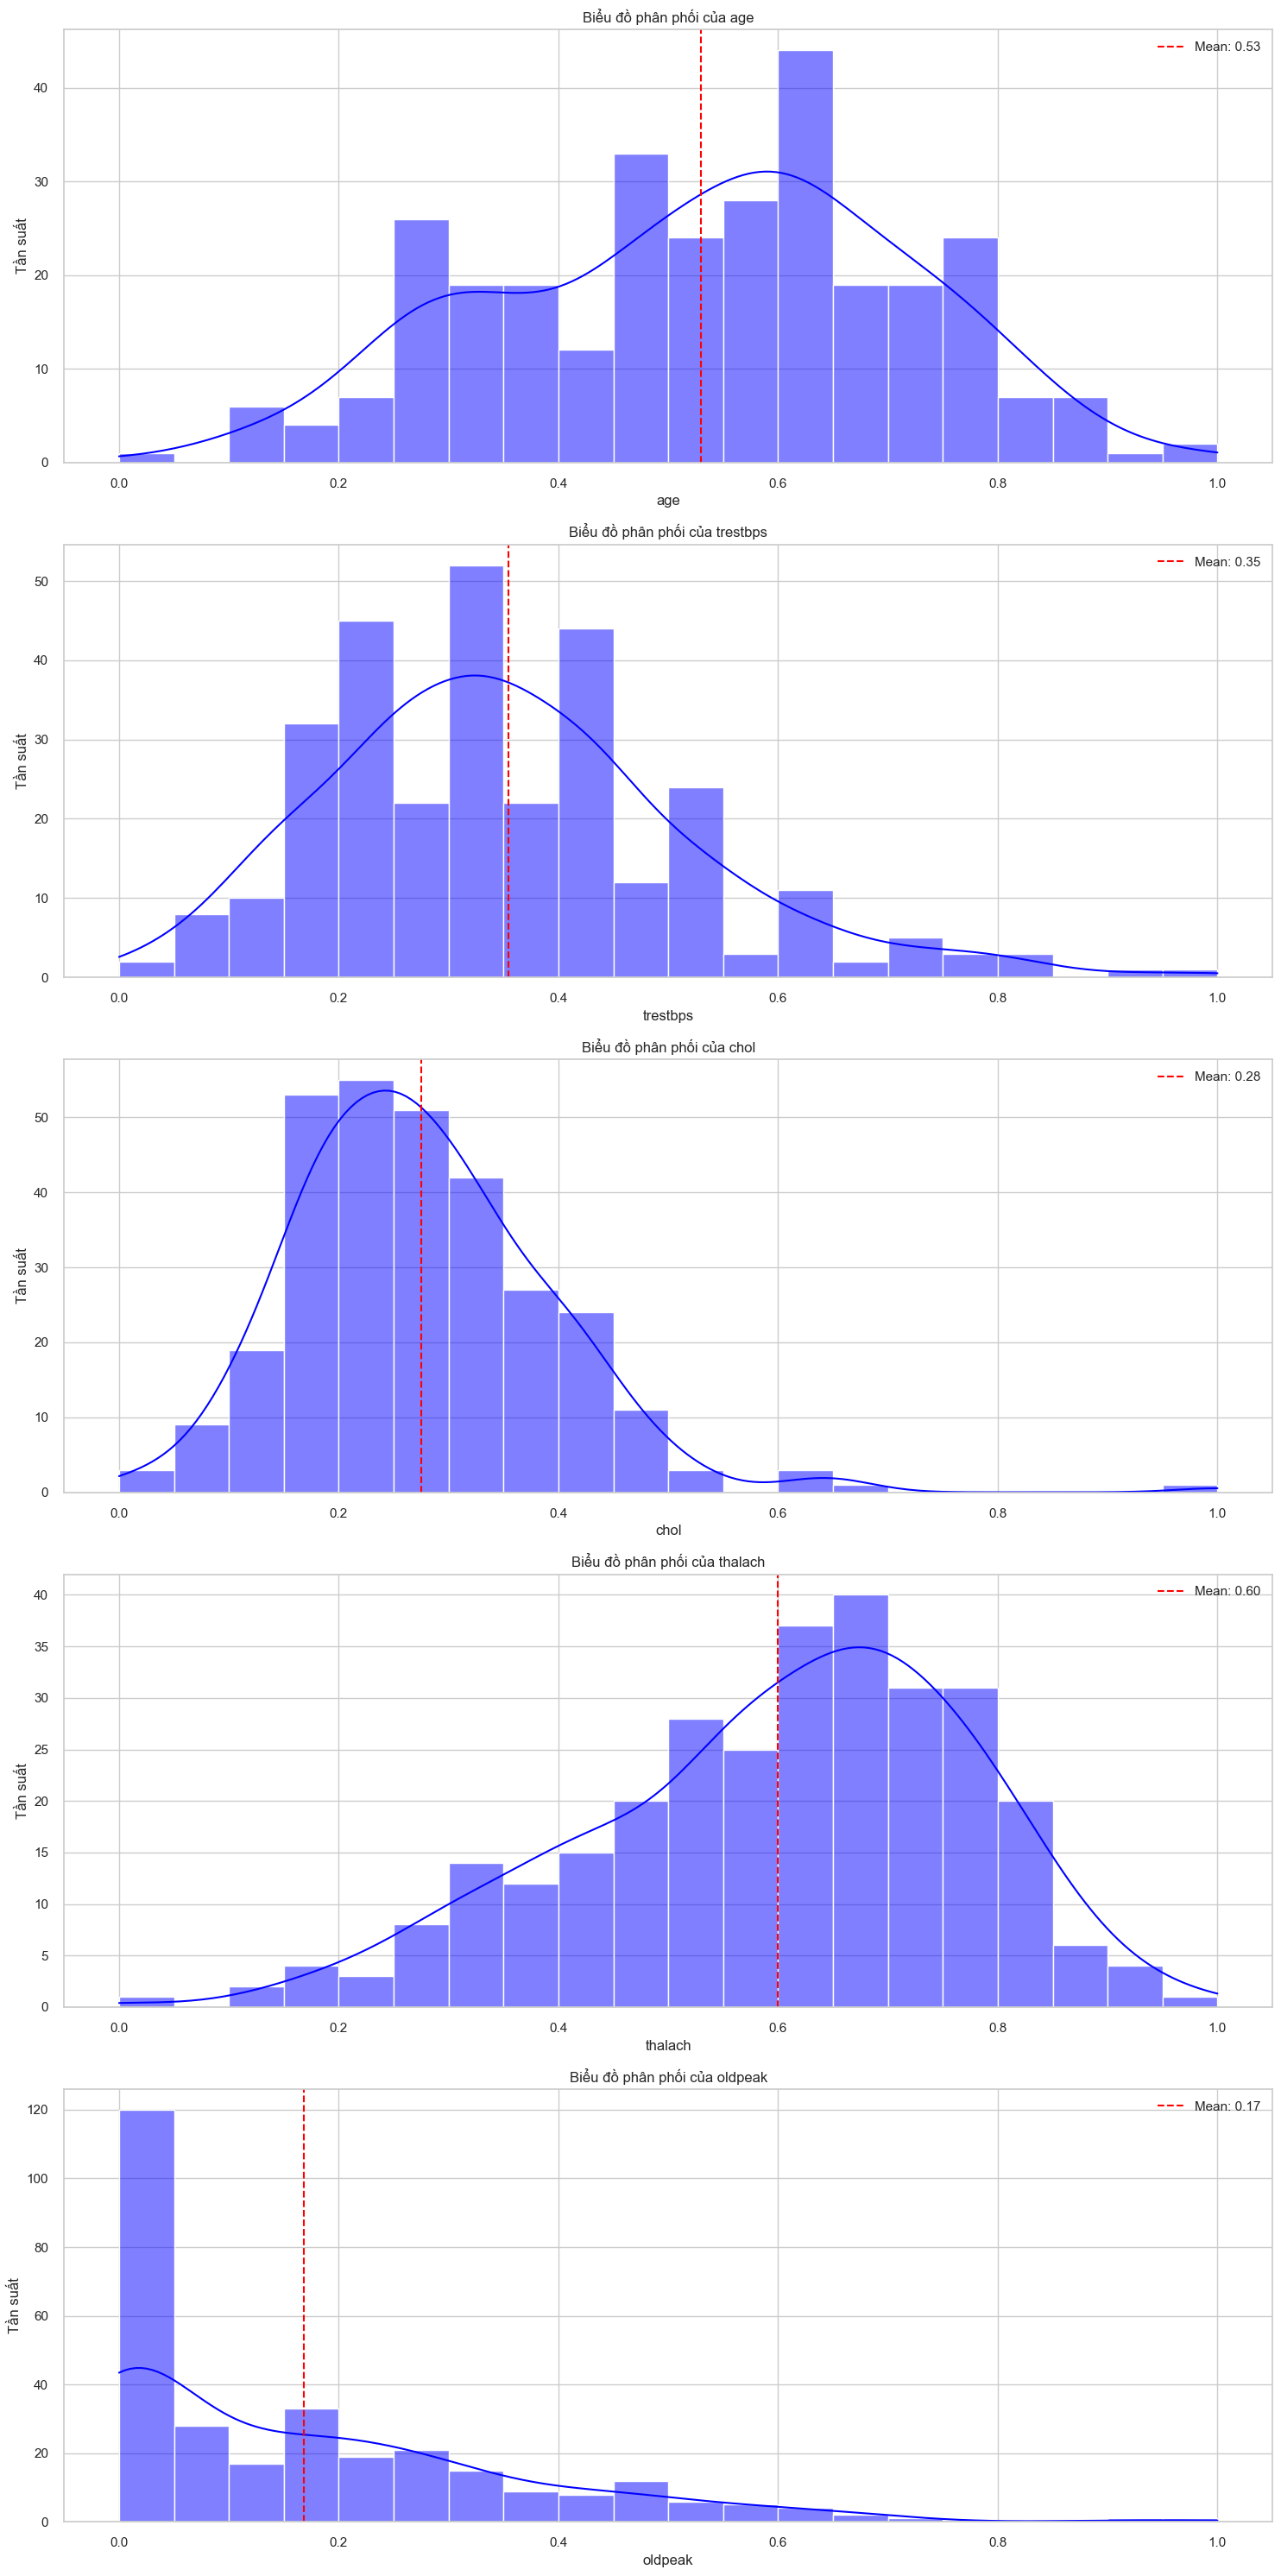

In [68]:
# Tạo biểu đồ phân phối với đường giá trị trung bình cho các cột 'age','trestbps','chol','thalach','oldpeak'
columns_to_plot = ['age','trestbps','chol','thalach','oldpeak']
averages = data5[columns_to_plot].mean()
plt.figure(figsize=(15, 30))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5,1, i)
    sns.histplot(data5[col], kde=True, color='blue', bins=20)
    plt.axvline(averages[col], color='red', linestyle='--', label=f'Mean: {averages[col]:.2f}')
    plt.title(f'Biểu đồ phân phối của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.legend()

plt.tight_layout()
plt.show()

In [69]:

# Biểu đồ 2: Đường huyết lúc đói > 120 mg/dl
plt.figure(figsize=(8, 5))
fbs_high.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Tỷ lệ bệnh nhân có đường huyết lúc đói > 120 mg/dl', fontsize=14)
plt.xlabel('FBS', fontsize=12)
plt.ylabel('Tỷ lệ (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['<= 120 mg/dl', '> 120 mg/dl'], rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Biểu đồ 3: Kết quả điện tâm đồ
plt.figure(figsize=(8, 5))
restecg_counts.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Kết quả điện tâm đồ', fontsize=14)
plt.xlabel('Loại điện tâm đồ', fontsize=12)
plt.ylabel('Tỷ lệ (%)', fontsize=12)
plt.xticks(ticks=range(3), labels=restecg_labels, rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'fbs_high' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Tính ma trận tương quan
correlation_matrix = data5.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Ma Trận Tương Quan", fontsize=16)
plt.show()

In [ ]:
# Đọc dữ liệu
data = pd.read_csv('heart_xulyngoailai.csv')

# Tính tỷ lệ bệnh nhân mắc bệnh tim theo loại đau ngực (cp)
cp_target = data.groupby('cp')['target'].mean() * 100  # Tính tỷ lệ
cp_labels = ['Không có triệu chứng', 'Đau thắt ngực không điển hình ', 'Không đau thắt ngực', 'Đau thắt ngực điển hình']

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
cp_target.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Tỷ lệ bệnh nhân mắc bệnh tim theo loại đau ngực', fontsize=14)
plt.xlabel('Loại đau ngực', fontsize=12)
plt.ylabel('Tỷ lệ bệnh nhân mắc bệnh tim (%)', fontsize=12)
plt.xticks(ticks=range(4), labels=cp_labels, rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

# Phân chia các nhóm mức cholesterol
bins = [0, 200, 239, 300, data['chol'].max()]
labels = ['bình thường (<200)', 'ranh giới cao (200-239)', 'Cao (240-300)', 'Rất cao (>300)']
data['nhom_cholesterol'] = pd.cut(data['chol'], bins=bins, labels=labels, include_lowest=True)

# Đếm số bệnh nhân trong từng nhóm
so_luong_nhom = data['nhom_cholesterol'].value_counts().sort_index()

# Vẽ biểu đồ phân phối mức cholesterol theo nhóm
plt.figure(figsize=(10, 6))
so_luong_nhom.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Phân phối mức cholesterol theo nhóm', fontsize=14)
plt.xlabel('Nhóm cholesterol', fontsize=12)
plt.ylabel('Số lượng bệnh nhân', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
